In [6]:
from typing import List
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import itertools

def BlackScholesFinalPrices(
    S_0: float, 
    r: float, 
    sigma: float, 
    T: float, 
    n: int,
    rng: np.random.Generator
) -> npt.NDArray[np.float64]:
    Z = rng.normal(loc=0, scale=1, size=(n))
    return S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

In [7]:
S_0 = 100
r = 0.05
sigma = 0.2
T = 1.0
n = 100_000
loops = 100

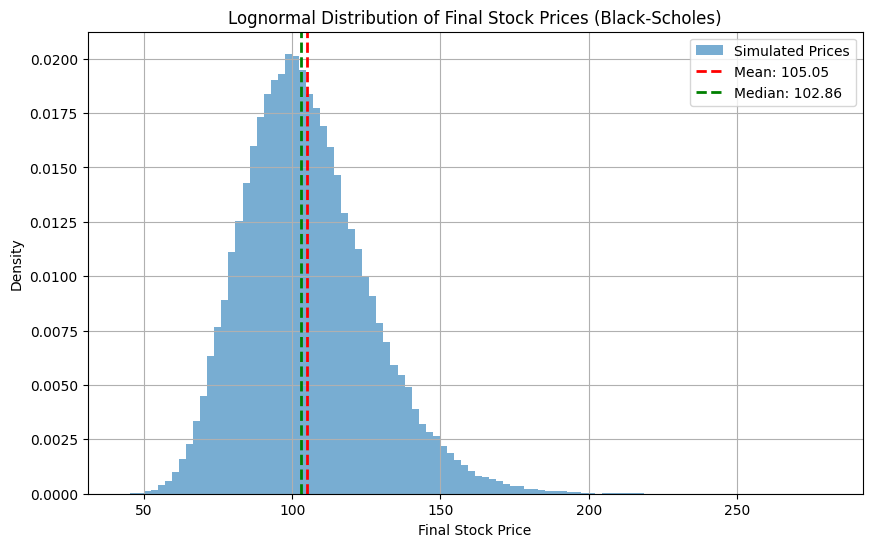

In [8]:
rng = np.random.default_rng(42)
prices_distribution = BlackScholesFinalPrices(S_0, r, sigma, T, n, rng)

plt.figure(figsize=(10, 6))
plt.hist(prices_distribution, bins=100, density=True, alpha=0.6, label="Simulated Prices")

mean_value = np.mean(prices_distribution)
median_value = np.median(prices_distribution)
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

plt.title("Lognormal Distribution of Final Stock Prices (Black-Scholes)")
plt.xlabel("Final Stock Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

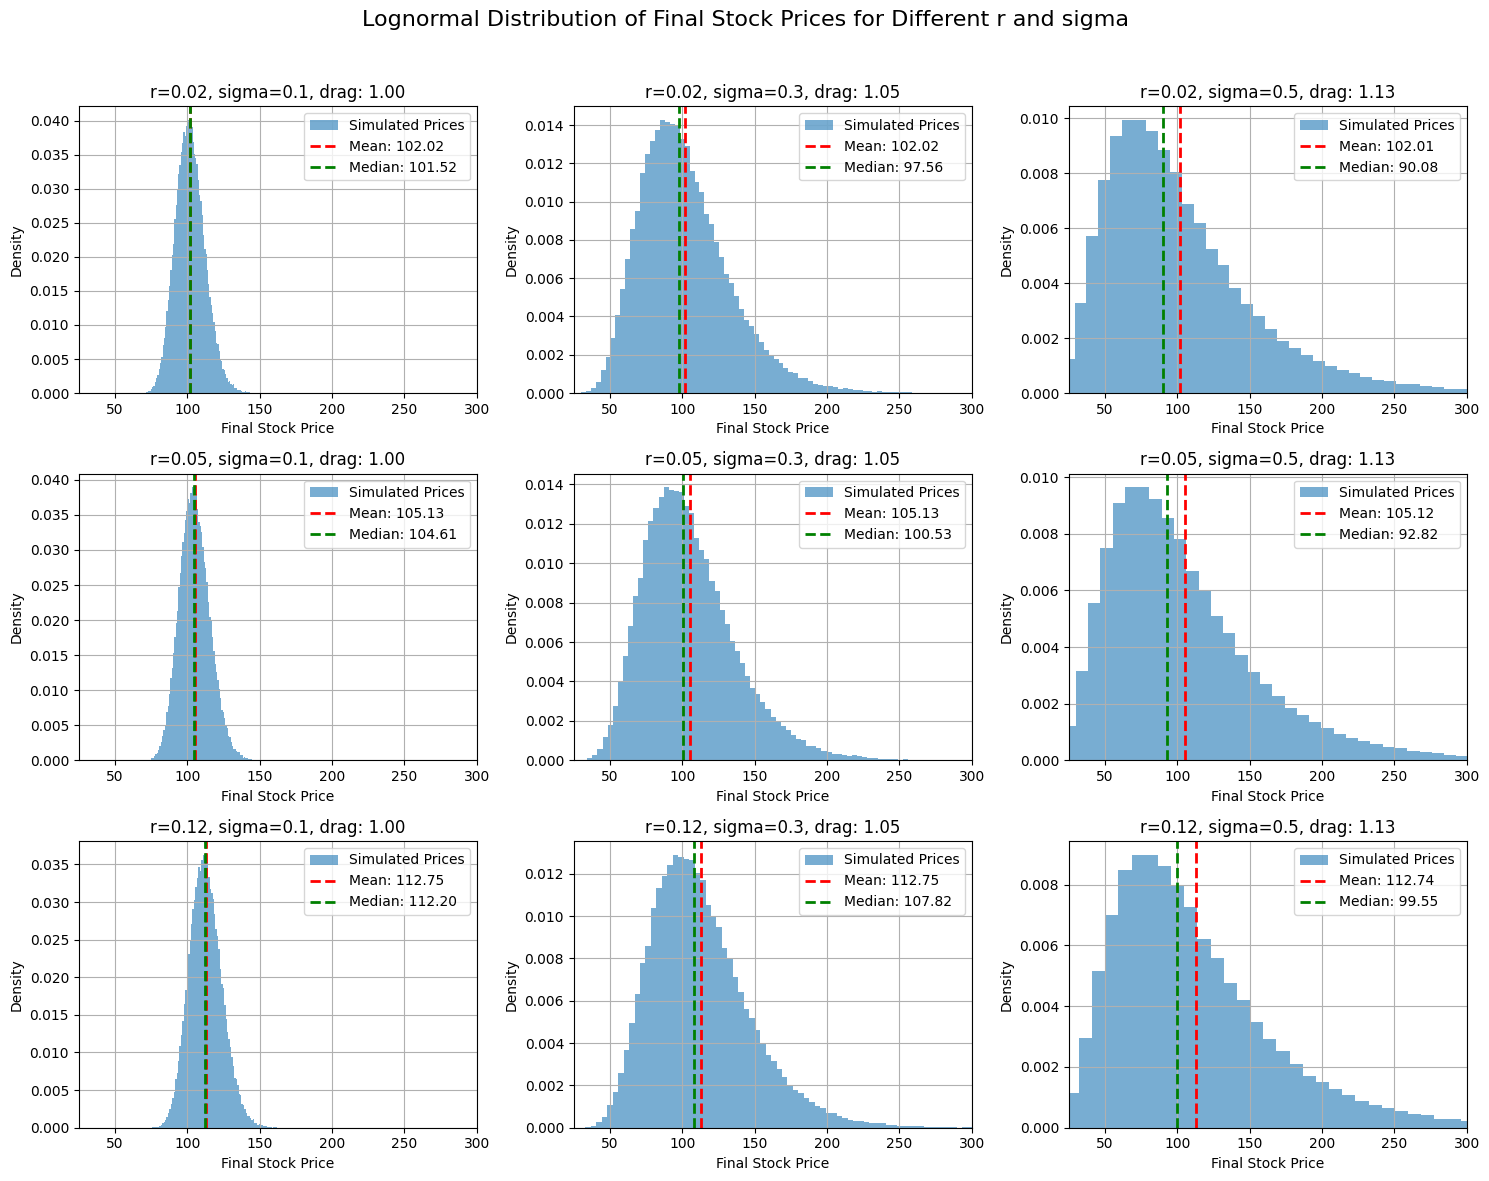

In [10]:
r_values = [0.02, 0.05, 0.12]
sigma_values = [0.1, 0.3, 0.5]
combinations = list(itertools.product(r_values, sigma_values))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Lognormal Distribution of Final Stock Prices for Different r and sigma", fontsize=16)

seed = np.random.randint(0, 999_999)
for ax, (r, sigma) in zip(axes.flat, combinations):
    rng = np.random.default_rng(seed)
    prices_distribution = BlackScholesFinalPrices(S_0, r, sigma, T, n, rng)

    mean_value = np.mean(prices_distribution)
    median_value = np.median(prices_distribution)
    drag_ratio = mean_value / median_value

    ax.hist(prices_distribution, bins=100, density=True, alpha=0.6, label="Simulated Prices")
    ax.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
    ax.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

    ax.set_title(f"r={r}, sigma={sigma}, drag: {drag_ratio:.2f}")
    ax.set_xlabel("Final Stock Price")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)
    
    ax.set_xlim([25, 300])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()